In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_excel("Unit6-Portfolio-Task-Data.xlsx")

### Data Preprocessing

In [3]:
df.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0,739,13,12,M,Single,23,Own,Unskilled,Low
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High
2,0,389,19,119,M,Single,38,Own,Management,High
3,638,347,13,14,M,Single,36,Own,Unskilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low


In [4]:
df.isna().sum()

Current Account    0
Savings Account    0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Job                0
Credit Risk        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Current Account  425 non-null    int64 
 1   Savings Account  425 non-null    int64 
 2   Months Customer  425 non-null    int64 
 3   Months Employed  425 non-null    int64 
 4   Gender           425 non-null    object
 5   Marital Status   425 non-null    object
 6   Age              425 non-null    int64 
 7   Housing          425 non-null    object
 8   Job              425 non-null    object
 9   Credit Risk      425 non-null    object
dtypes: int64(5), object(5)
memory usage: 33.3+ KB


In [6]:
df.describe()

,Current Account,Savings Account,Months Customer,Months Employed,Age
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1048.014118,1812.562353,22.896471,31.896471,34.397647
std,3147.183472,3597.285020,12.267599,32.259321,11.045126
min,0.000000,0.000000,5.000000,0.000000,18.000000
25%,0.000000,228.000000,13.000000,6.000000,26.000000
50%,0.000000,596.000000,19.000000,20.000000,32.000000
75%,560.000000,921.000000,28.000000,47.000000,41.000000
max,19812.000000,19811.000000,73.000000,119.000000,73.000000


In [7]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

### Data Analysis

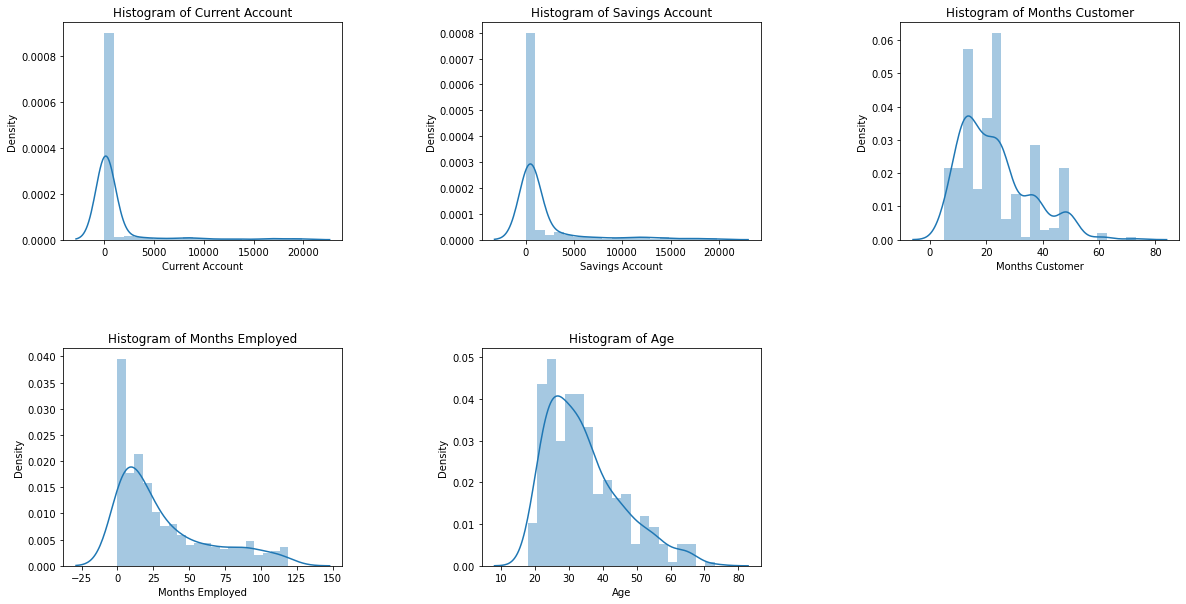

In [8]:
plt.figure(1, figsize=(20,10))
n=0
for x in ["Current Account","Savings Account","Months Customer","Months Employed","Age"]:
    n += 1 
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Histogram of {}".format(x))
plt.show()

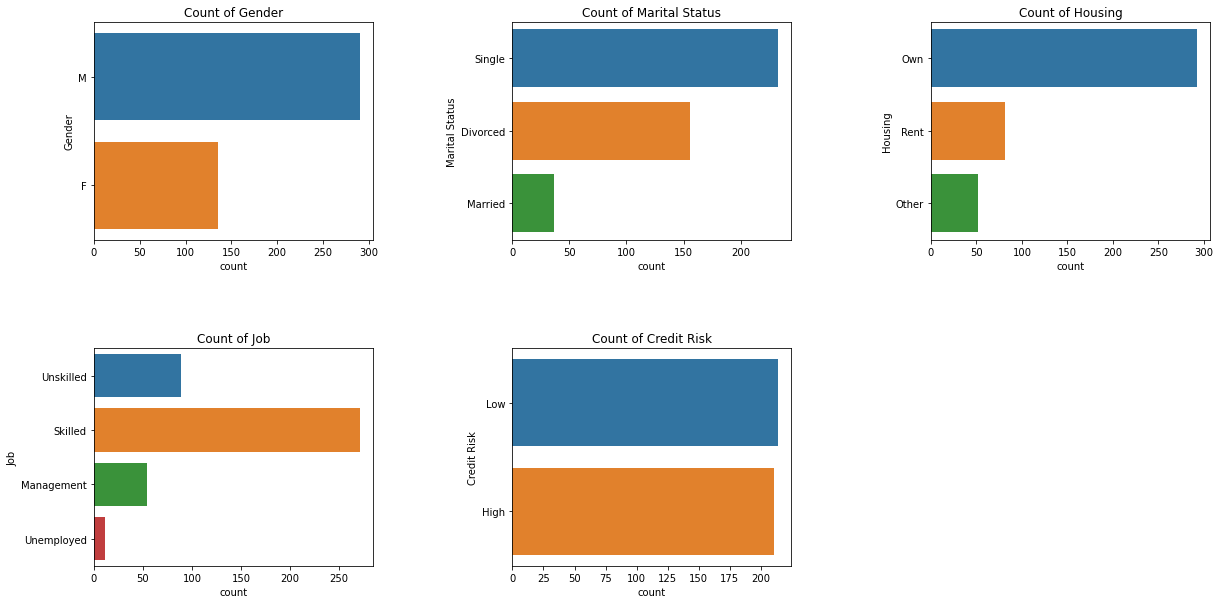

In [9]:
plt.figure(1, figsize=(20,10))
n=0
for x in ["Gender","Marital Status","Housing","Job","Credit Risk"]:
    n += 1 
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.countplot(y=x, data=df)
    plt.title("Count of {}".format(x))
plt.show()

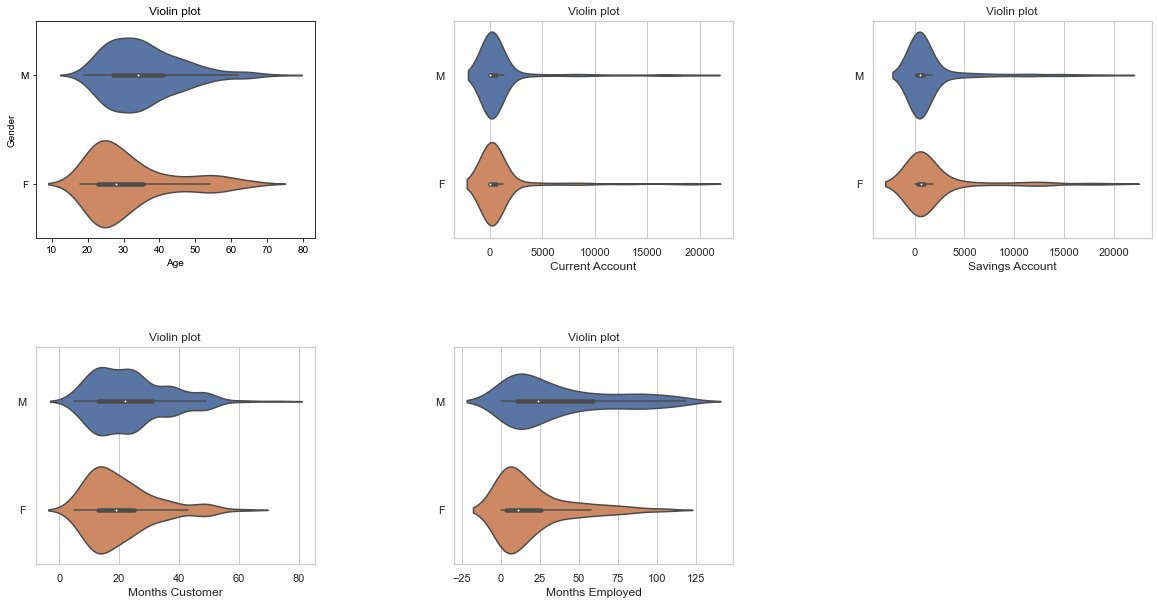

In [10]:
plt.figure(1, figsize=(20,10))
n=0
for cols in ["Age","Current Account","Savings Account","Months Customer","Months Employed"]:
    n += 1 
    plt.subplot(2,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x = cols, y="Gender", data=df)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin plot")
plt.show()

Text(0, 0.5, 'Number of customerss')

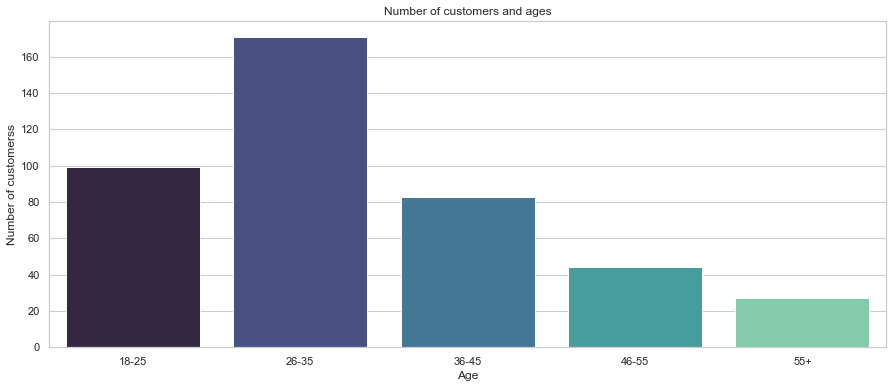

In [11]:
age_18_25 = df.Age[(df.Age >= 19) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age > 55)]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey,palette="mako")
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customerss")

### Encoding categorical features & Scaling

In [16]:
le = LabelEncoder()
encoded_data = pd.DataFrame()
encoded_data["Gender"] = le.fit_transform(df["Gender"])
encoded_data["Marital Status"] = le.fit_transform(df["Marital Status"])
encoded_data["Credit Risk"] = le.fit_transform(df["Credit Risk"])

In [17]:
enc = OrdinalEncoder()
ar1 = enc.fit_transform(df.drop(["Current Account", "Savings Account", "Months Customer","Months Employed","Gender","Marital Status","Age","Credit Risk"],axis=1))
housing_job = pd.DataFrame(ar1, columns=["Housing","Job"])
encoded_data[["Housing","Job"]] = housing_job

In [18]:
encoded_data

,Gender,Marital Status,Credit Risk,Housing,Job
0,1,2,1,1.0,3.0
1,1,0,0,1.0,1.0
2,1,2,0,1.0,0.0
3,1,2,0,1.0,3.0
4,1,2,1,2.0,1.0
...,...,...,...,...,...
420,1,2,1,0.0,1.0
421,1,2,0,1.0,1.0
422,0,0,0,1.0,1.0
423,0,0,0,1.0,1.0


In [21]:
scaler = MinMaxScaler()
encoded_data[["Current Account","Savings Account","Months Customer","Months Employed","Age"]] = scaler.fit_transform(df[["Current Account","Savings Account","Months Customer","Months Employed","Age"]])

In [27]:
df.columns

Index(['Current Account', 'Savings Account', 'Months Customer',
       'Months Employed', 'Gender', 'Marital Status', 'Age', 'Housing', 'Job',
       'Credit Risk'],
      dtype='object')

In [28]:
encoded_data = encoded_data.reindex(columns=['Current Account', 'Savings Account', 'Months Customer',
       'Months Employed', 'Gender', 'Marital Status', 'Age', 'Housing', 'Job',
       'Credit Risk'])

In [30]:
encoded_data.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0.000000,0.037303,0.117647,0.100840,1,2,0.090909,1.0,3.0,1
1,0.000000,0.062087,0.294118,0.000000,1,0,0.254545,1.0,1.0,0
2,0.000000,0.019636,0.205882,1.000000,1,2,0.363636,1.0,0.0,0
3,0.032203,0.017516,0.117647,0.117647,1,2,0.327273,1.0,3.0,0
4,0.048607,0.239968,0.514706,0.378151,1,2,0.236364,2.0,1.0,1


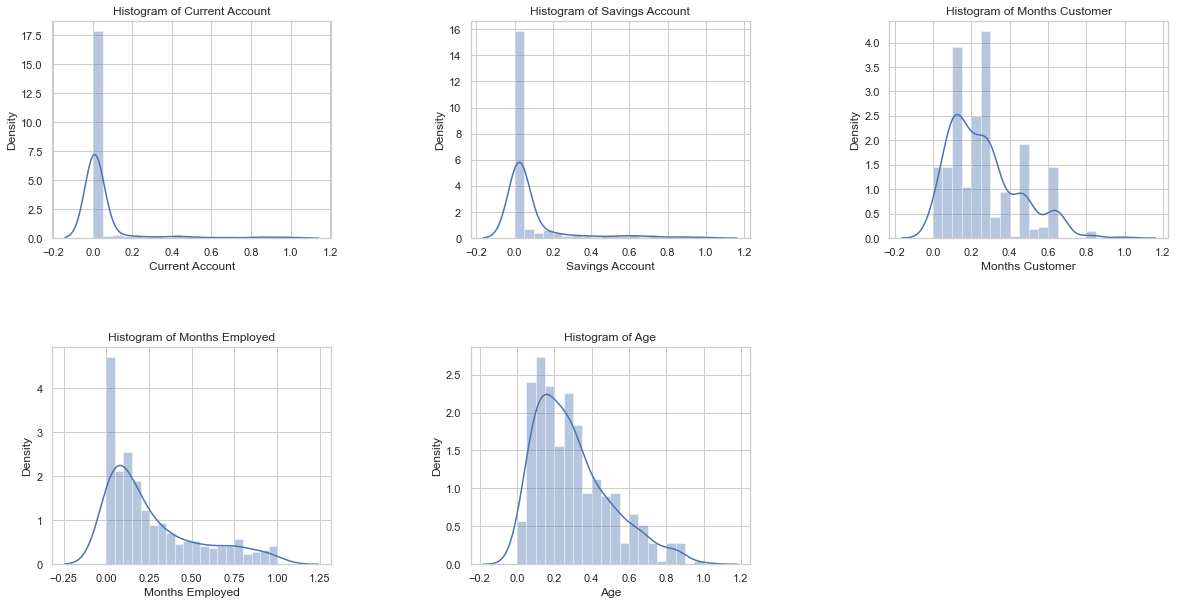

In [31]:
plt.figure(1, figsize=(20,10))
n=0
for x in ["Current Account","Savings Account","Months Customer","Months Employed","Age"]:
    n += 1 
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(encoded_data[x], bins=20)
    plt.title("Histogram of {}".format(x))
plt.show()

### Clustering

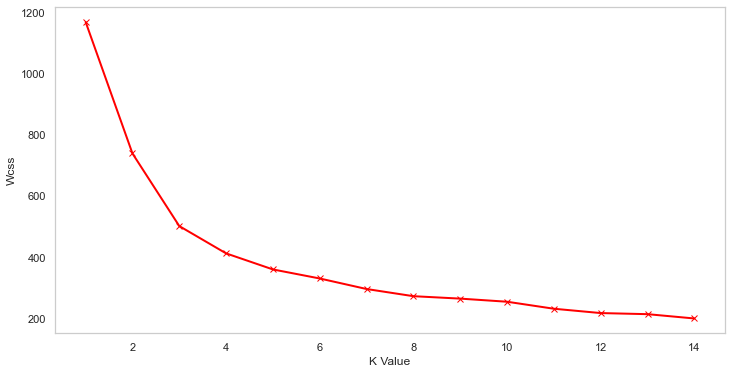

In [33]:
X = encoded_data
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2,color="red",marker="x")
plt.xlabel("K Value")
plt.ylabel("Wcss")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X)
print(len(X))
print(len(label))
print(label)

425
425
[0 1 2 0 2 2 0 0 2 1 2 0 2 2 0 1 1 2 2 1 1 1 2 1 0 2 2 2 2 2 2 2 1 2 1 0 1
 0 2 2 2 0 2 2 1 2 1 2 2 2 2 0 2 1 2 2 1 0 1 2 0 0 0 0 2 2 0 1 2 2 0 0 2 2
 2 1 1 2 2 2 0 2 0 1 2 1 2 2 1 1 0 1 0 1 1 2 2 0 1 2 2 2 2 1 2 0 2 1 2 2 0
 0 0 2 2 1 1 2 2 1 1 1 2 2 2 2 2 1 2 0 2 1 0 2 2 0 1 2 1 2 1 1 2 0 1 0 0 0
 1 2 2 2 2 2 2 2 2 1 2 0 2 1 0 2 1 1 2 0 0 0 2 1 0 0 1 2 2 2 2 1 0 0 0 0 0
 2 2 0 2 2 1 1 2 1 2 1 2 0 2 0 0 2 1 1 0 1 1 2 2 0 2 2 0 2 2 1 2 0 1 2 1 1
 1 2 1 1 0 2 1 1 1 0 0 2 0 0 0 1 2 2 0 2 2 0 1 1 0 0 1 1 2 2 1 1 2 2 2 1 2
 0 2 2 2 2 2 1 2 2 1 2 1 0 1 2 1 1 2 1 2 0 0 2 2 2 1 2 0 1 1 2 1 2 1 1 2 2
 1 2 2 2 2 2 0 2 2 2 1 1 2 2 0 1 2 2 2 2 1 1 1 2 0 0 0 1 1 1 2 2 2 1 2 2 2
 2 2 1 2 2 2 2 1 2 2 1 2 0 0 2 2 1 1 0 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 0 0 2 1 1 2 2 2 2 1 2 2 1 2 0 1 2 0 2 1 1 2 0 1 1 2 2 2 0 0 2 0 1 2 1
 2 2 1 2 0 1 1 1 2 2 0 2 0 2 2 1 1 2]


In [35]:
print(kmeans.cluster_centers_)

[[0.06150033 0.09378516 0.18088235 0.22810458 0.68888889 1.17777778
  0.32565657 1.14444444 2.98888889 0.52222222]
 [0.04293138 0.09333891 0.25130455 0.15708864 0.13709677 0.
  0.25513196 1.23387097 0.93548387 0.41129032]
 [0.05508582 0.08942995 0.30526903 0.35027281 1.         1.87677725
  0.311676   0.93838863 0.82938389 0.54976303]]


In [39]:
df["KMeanCluster_3"] = label
df

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk,KMeanCluster_3
0,0,739,13,12,M,Single,23,Own,Unskilled,Low,0
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High,1
2,0,389,19,119,M,Single,38,Own,Management,High,2
3,638,347,13,14,M,Single,36,Own,Unskilled,High,0
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low,2
...,...,...,...,...,...,...,...,...,...,...,...
420,497,0,7,51,M,Single,35,Other,Skilled,Low,2
421,0,0,31,53,M,Single,30,Own,Skilled,High,2
422,0,0,25,103,F,Divorced,28,Own,Skilled,High,1
423,0,712,16,6,F,Divorced,28,Own,Skilled,High,1
